# Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.

One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.

In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.
You should:

- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
- Identify target groups
- Suggest measures to cut churn
- Describe any other patterns you see with respect to interaction with customers

### Step - Download the data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
!pip install sidetable 
import sidetable




In [2]:
data = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
data.columns = data.columns.str.lower()

In [4]:
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
data['contract_period'].value_counts()

1     2207
12     960
6      833
Name: contract_period, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [7]:
data.shape

(4000, 14)

### Step - Carry out exploratory data analysis (EDA)

- Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).
- Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).
- Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
- Build a correlation matrix and display it.

In [8]:
# Look at the dataset: does it contain any missing features? 
# Study the mean values and standard deviation (use the describe() method)

data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [9]:
# Look at the mean feature values in two groups: for those who left (churn) and for those who stayed 

churn = data[data['churn'] == 1]
stayed = data[data['churn'] == 0]

In [10]:
churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


In [11]:
stayed.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


In [12]:
# Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

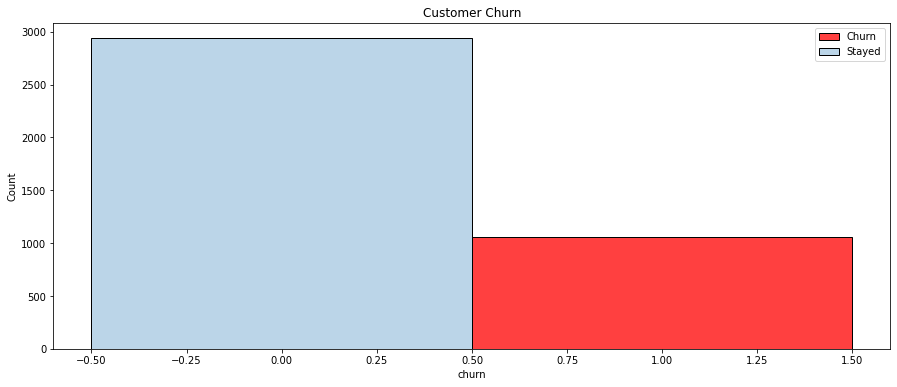

In [13]:
plt.figure(figsize=(15, 6))
sns.histplot(data=churn, x='churn', color='red')
sns.histplot(data=stayed, x='churn', alpha=0.3).set(title='Customer Churn')
plt.legend(labels=['Churn', 'Stayed'])
plt.show() 

In [14]:
def histograms(column):
    plt.figure(figsize=(15, 6))
    sns.histplot(data=churn, x=(column), color='red', label = 'churn')
    sns.histplot(data=stayed, x=(column), alpha=0.3).set(title=(column))
    plt.legend(labels=['Churn', 'Stayed'])
    plt.show() 

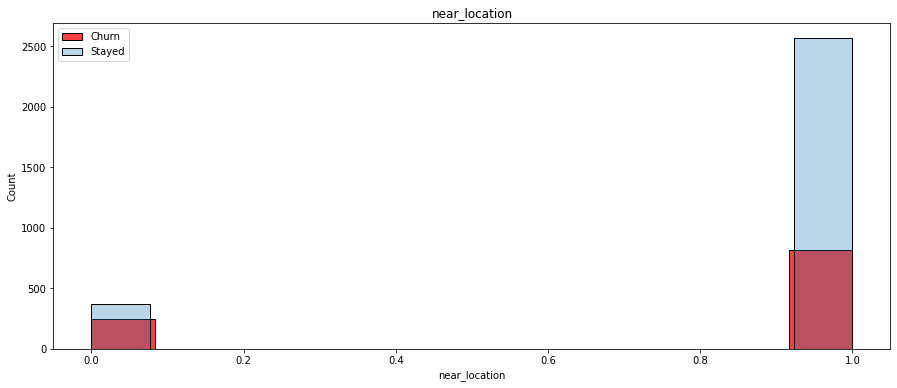

In [15]:
histograms('near_location')

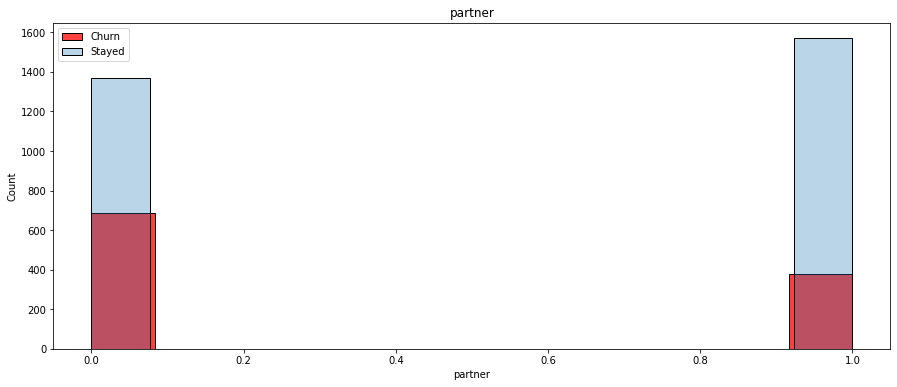

In [16]:
histograms('partner')

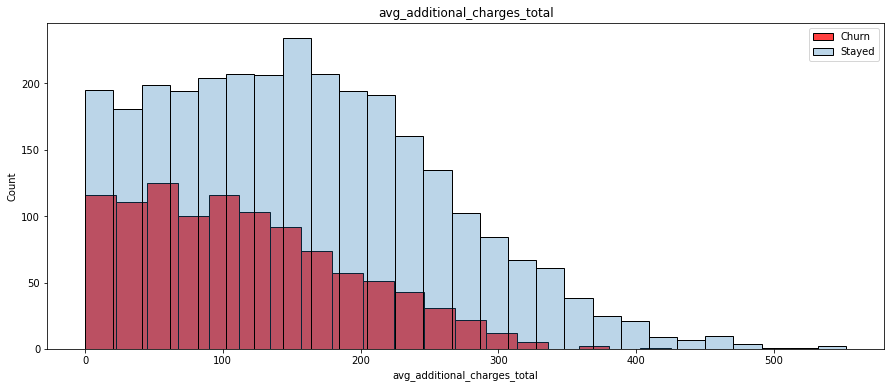

In [17]:
histograms('avg_additional_charges_total')

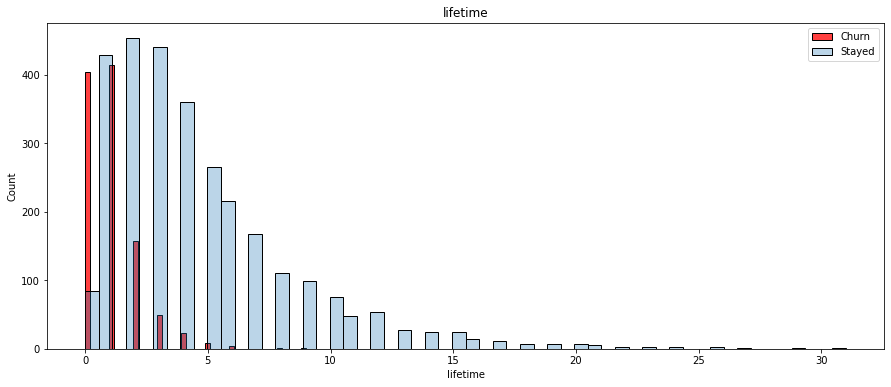

In [18]:
histograms('lifetime')

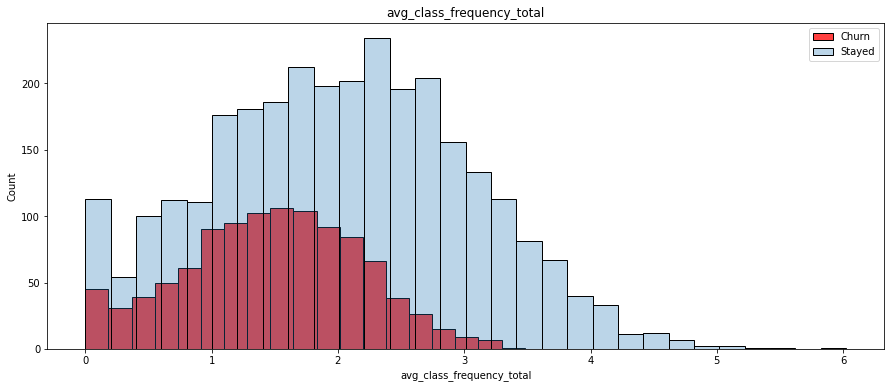

In [19]:
histograms('avg_class_frequency_total')

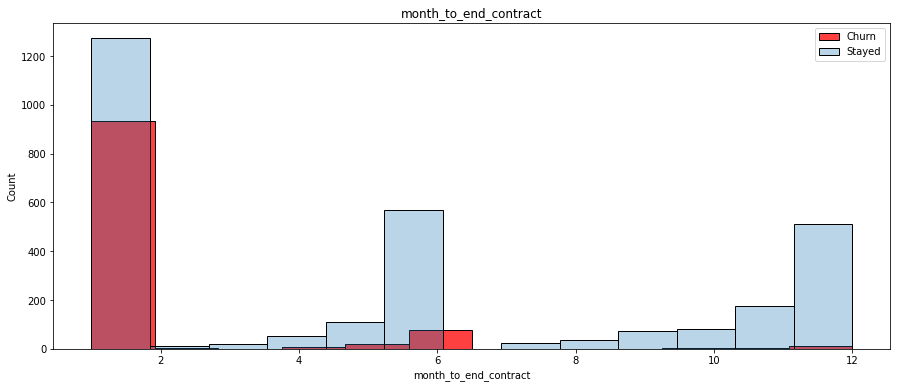

In [20]:
histograms('month_to_end_contract')

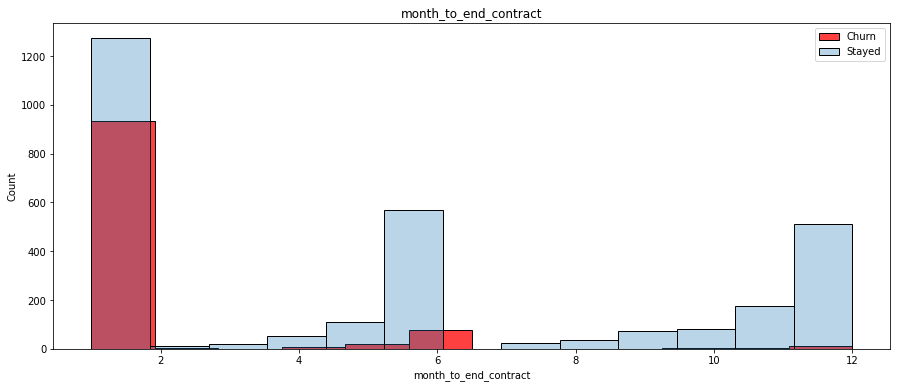

In [21]:
histograms('month_to_end_contract')

#### Conclusions

**Clients who stay:**

- Conform about 75% of all clients
- Seem to leave closer to the gym
- Got discounts to join, either through partner companies or the promo_friends offer
- Usually spend more on additional charges than those who left
- Usually have about 3x times lifetime in the gym than those who left
- Visit the gym about 25% more times per week than those who left
- Have about 3x frequency of visits per month

**Clients that left:**

- Have shorter contract periods that those who stayed
- Usually don't take part in group sessions
- Have shorter amount of months remaining until the contract expires that those who stay

In [22]:
# Build a correlation matrix and display it.

In [23]:
data.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


<AxesSubplot:title={'center':'Features Correlation Matrix'}>

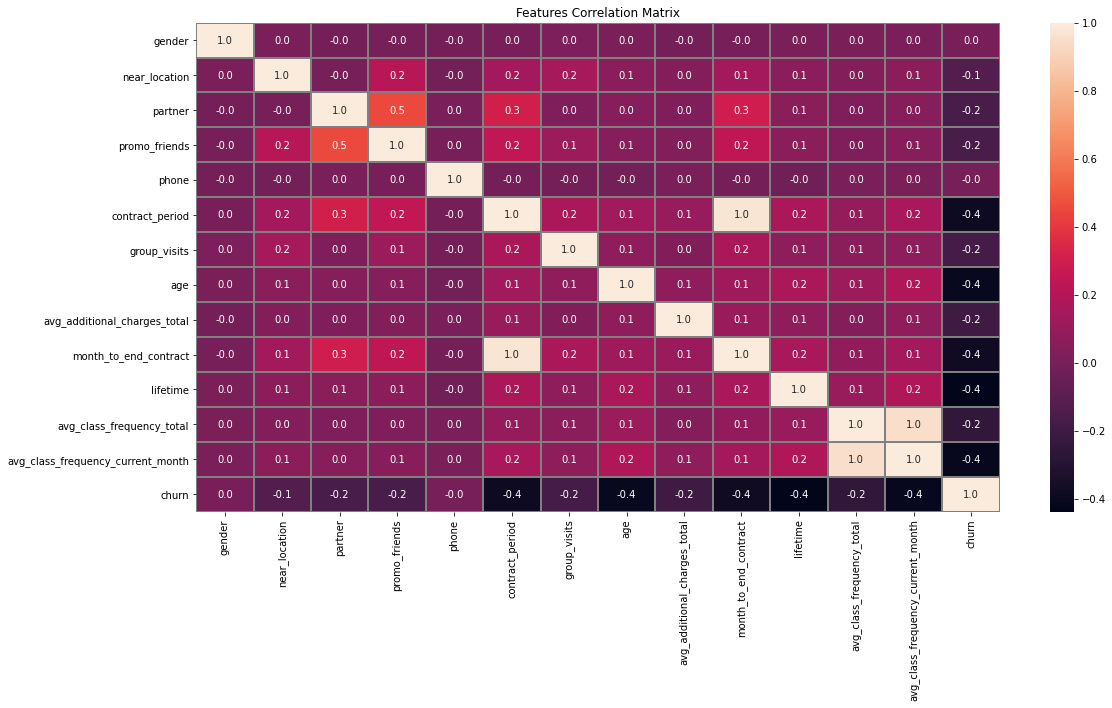

In [24]:
correlation = data.corr()

plt.figure(figsize=(18, 9))
plt.title('Features Correlation Matrix')
sns.heatmap(
    correlation,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',)


#### Conclusions

- promo_friends & partner have the strongest positive correlation
- churn has negative correlation with contract period, age, month to end contract, lifetime and avg_class_frequecy_current month. This means that the longer the contract period, the lower the churn rate. The longer the lifetime of a client, the lower the churn rate, etc.


### Step - Build a model to predict user churn

- Build a binary classification model for customers where the target feature is the user's leaving next month.
- Divide the data into train and validation sets using the train_test_split() function.
- Train the model on the train set with two methods:
    - logistic regression
    - random forest
- Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. - Which model gave better results?

Remember to indicate the random_state parameter when dividing data and defining the algorithm.

In [25]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


In [26]:
print('Dataset size:', data.shape)

# look at the ratio between the dataset classes
data['churn'].value_counts()


Dataset size: (4000, 14)


0    2939
1    1061
Name: churn, dtype: int64

In [27]:
# Define the algorithm for the logistic regression model

# divide the data into features (the X matrix) and a target variable (y)
X = data.drop('churn', axis = 1)
y = data['churn']

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=0)
# train the model
lr_model.fit(X_train_st, y_train)
# use the trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# print all metrics
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')


Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


In [28]:
# define the algorithm for the random forest model

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # write your code here
# train the random forest model
rf_model.fit(X_train, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test) # write your code here
rf_probabilities = rf_model.predict_proba(X_test)[:,1]# write your code here
# print all metrics
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')



Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
	F1: 0.83
	ROC_AUC: 0.97


#### Conclusions

Both models' results are similar, but seems that Logistic Regression gives better results since Precision and Recall give higher results

### Step - Create user clusters

- Set aside the column with data on churn and identify object (user) clusters:
- Standardize the data.
- Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
- Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
- Look at the mean feature values for clusters. Does anything catch your eye?
- Plot distributions of features for the clusters. Do you notice anything?
- Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [ ]:
# Standardize the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Use linkage() function to build a matrix of distances based on the standardized feature matrix and plot dendrogram
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show()


In [ ]:
# Train the clustering model with the K-means algorithm and predict customer clusters
km = KMeans(n_clusters = 5, random_state=0)

labels = km.fit_predict(X_sc)

# set aside the column with data on churn and identify object (user) clusters
data['cluster_km'] = labels

# get the statistics of the mean feature values per cluster
mean_clusters = data.groupby('cluster_km').mean().reset_index()

mean_clusters

In [ ]:
for col in data:
    sns.kdeplot(data=data, x=col, hue='cluster_km')
    plt.show()

#### Conclusions

**Most loyal clients: clusters 0, 2 and 3**
- Users in these clusters live mostly close to the gym
- They have the longest lifetime belonging to the gym
- They have the highest avg_class_frequency_total, which means the business should pay attention to clients who start missing classes from the beginning to avoid churn

**Highest churn rate: clusters 1 and 4**
- One of these clusters lives close to the gym, and one doesn't, which means this is not the only defining factor on churn rate
- Both clusters have the lowest avg_additional_charges_total, which means that customers that spend less in the gym are most prone to leave
- They have shortest lifetime in the gym, which means the business should invest more in newer clients
- Have generally around 2 months to end contract
- Have the lowest group_visits number, so the gym should invest in motivating users to take part in group sessions